# List of U.S. states and territories by area


## 1. Load Dictionaries

In [20]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns


# numpy is optional
# All warnings due to version issues with seaborn
import warnings
warnings.filterwarnings("ignore")
# Reset the warning filters to their original state if no longer needed


## 2. Scrape data table

In [2]:
# The wikitable is scraped using BeautifulSoup

url = "https://en.wikipedia.org/wiki/List_of_U.S._states_and_territories_by_area"
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

# Find the table based on its class
table = soup.find('table', {'class': 'wikitable'})

# Create a list to store the data
data = []

# Extract data from the table and store it in the list
if table:
    for row in table.find_all('tr'):
        cols = row.find_all(['th', 'td'])
        row_data = [col.get_text(strip=True) for col in cols]
        data.append(row_data)

# Create a DataFrame from the list
df = pd.DataFrame(data)

## 3. Explore Data

In [3]:
df.shape

(62, 12)

In [4]:
df.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11
0,State,Total area[2],Land area[2],Water[2],None,None,None,None,None,None,None,None
1,Rank,sq mi,km2,Rank,sq mi,km2,% land,Rank,sq mi,km2,% water,None
2,Alaska,1,"665,384.04","1,723,337",1,"570,640.95","1,477,953",85.76%,1,"94,743.10","245,384",14.24%
3,Texas,2,"268,596.46","695,662",2,"261,231.71","676,587",97.26%,8,"7,364.75","19,075",2.74%
4,California,3,"163,694.74","423,967",3,"155,779.22","403,466",95.16%,6,"7,915.52","20,501",4.84%


In [5]:
df.tail(14)

,0,1,2,3,4,5,6,7,8,9,10,11
48,New Jersey,47,"8,722.58","22,591",46,"7,354.22","19,047",84.31%,27,"1,368.36","3,544",15.69%
49,Connecticut,48,"5,543.41","14,357",48,"4,842.36","12,542",87.35%,38,701.06,"1,816",12.65%
50,Delaware,49,"2,488.72","6,446",49,"1,948.54","5,047",78.29%,40,540.18,"1,399",21.71%
51,Rhode Island,50,"1,544.89","4,001",50,"1,033.81","2,678",66.92%,43,511.07,"1,324",33.08%
52,District of Columbia,—,68.34,177,—,61.05,158,89.33%,—,7.29,19,10.67%
53,Puerto Rico,—,"5,324.84","13,791",—,"3,423.78","8,868",64.30%,—,"1,901.07","4,924",35.70%
54,Northern Mariana Islands,—,"1,975.57","5,117",—,182.33,472,9.23%,—,"1,793.24","4,644",90.77%
55,United States Virgin Islands,—,732.93,"1,898",—,134.32,348,18.33%,—,598.61,"1,550",81.67%
56,American Samoa,—,581.05,"1,505",—,76.46,198,13.16%,—,504.60,"1,307",86.84%
57,Guam,—,570.62,"1,478",—,209.80,543,36.77%,—,360.82,935,63.23%


## 4. Clean the Data

In [6]:
# Drop rows with non-states by index
indices_to_drop = list(range(52, 62))
df = df.drop(index=indices_to_drop)
df.tail(10)

,0,1,2,3,4,5,6,7,8,9,10,11
42,West Virginia,41,"24,230.04","62,756",41,"24,038.21","62,259",99.21%,50,191.83,497,0.79%
43,Maryland,42,"12,405.93","32,131",42,"9,707.24","25,142",78.25%,18,"2,698.69","6,990",21.75%
44,Hawaii,43,"10,931.72","28,313",47,"6,422.63","16,635",58.75%,13,"4,509.09","11,678",41.25%
45,Massachusetts,44,"10,554.39","27,336",45,"7,800.06","20,202",73.90%,16,"2,754.33","7,134",26.10%
46,Vermont,45,"9,616.36","24,906",43,"9,216.66","23,871",95.84%,46,399.71,"1,035",4.16%
47,New Hampshire,46,"9,349.16","24,214",44,"8,952.65","23,187",95.76%,47,396.51,"1,027",4.24%
48,New Jersey,47,"8,722.58","22,591",46,"7,354.22","19,047",84.31%,27,"1,368.36","3,544",15.69%
49,Connecticut,48,"5,543.41","14,357",48,"4,842.36","12,542",87.35%,38,701.06,"1,816",12.65%
50,Delaware,49,"2,488.72","6,446",49,"1,948.54","5,047",78.29%,40,540.18,"1,399",21.71%
51,Rhode Island,50,"1,544.89","4,001",50,"1,033.81","2,678",66.92%,43,511.07,"1,324",33.08%


In [7]:
# Drop the first row
df = df.drop(1)
df = df.reset_index(drop=True)
df.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11
0,State,Total area[2],Land area[2],Water[2],None,None,None,None,None,None,None,None
1,Alaska,1,"665,384.04","1,723,337",1,"570,640.95","1,477,953",85.76%,1,"94,743.10","245,384",14.24%
2,Texas,2,"268,596.46","695,662",2,"261,231.71","676,587",97.26%,8,"7,364.75","19,075",2.74%
3,California,3,"163,694.74","423,967",3,"155,779.22","403,466",95.16%,6,"7,915.52","20,501",4.84%
4,Montana,4,"147,039.71","380,831",4,"145,545.80","376,962",98.98%,26,"1,493.91","3,869",1.02%


In [8]:
print(list(df.columns))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


In [9]:
df = df.drop(columns=[1, 2, 4, 5, 7, 8, 9, 11])
df.columns

Index([0, 3, 6, 10], dtype='int64')

In [10]:
df = df.replace({',':''}, regex=True)
columns_to_convert = [3, 6, 10]
df[columns_to_convert] = df[columns_to_convert].apply(pd.to_numeric, errors='coerce').astype(float)
df.head(5)

,0,3,6,10
0,State,NaN,NaN,NaN
1,Alaska,1723337.0,1477953.0,245384.0
2,Texas,695662.0,676587.0,19075.0
3,California,423967.0,403466.0,20501.0
4,Montana,380831.0,376962.0,3869.0


In [11]:
df.columns=data[0]
df.columns

Index(['State', 'Total area[2]', 'Land area[2]', 'Water[2]'], dtype='object')

In [12]:
new_column_names = {'Total area[2]':'Total Area (km2)', 'Land area[2]':'Land (km2)', 'Water[2]':'waterways (km2)'}
df.rename(columns=new_column_names, inplace=True)
df = df.drop([0])
df.reset_index()
df.head(5)

,State,Total Area (km2),Land (km2),waterways (km2)
1,Alaska,1723337.0,1477953.0,245384.0
2,Texas,695662.0,676587.0,19075.0
3,California,423967.0,403466.0,20501.0
4,Montana,380831.0,376962.0,3869.0
5,New Mexico,314917.0,314161.0,757.0


In [13]:
# Check for any missing values
nan_values = df[df.isna()].stack()
print(nan_values)

Series([], dtype: object)


## 4. Describe the data

In [14]:
df.shape

(50, 4)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 1 to 50
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   State             50 non-null     object 
 1   Total Area (km2)  50 non-null     float64
 2   Land (km2)        50 non-null     float64
 3   waterways (km2)   50 non-null     float64
dtypes: float64(3), object(1)
memory usage: 1.7+ KB


In [16]:
df.describe()

,Total Area (km2),Land (km2),waterways (km2)
count,5.000000e+01,5.000000e+01,50.000000
mean,1.966668e+05,1.829487e+05,13718.160000
std,2.520769e+05,2.222615e+05,36923.113729
min,4.001000e+03,2.678000e+03,497.000000
25%,9.690850e+04,9.515900e+04,1828.000000
50%,1.478705e+05,1.395775e+05,3888.000000
75%,2.190222e+05,2.103735e+05,11325.750000
max,1.723337e+06,1.477953e+06,245384.000000


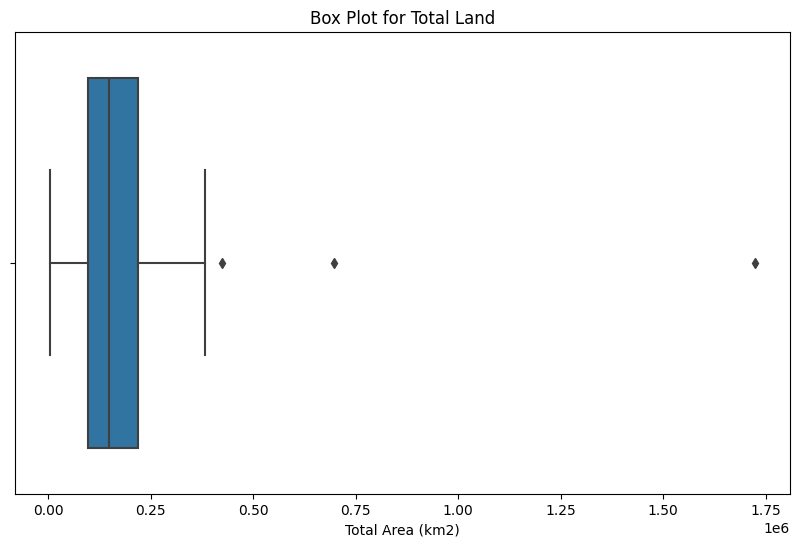

In [21]:
# Visualizing the distribution of the land resources can be helpful
column = 'Total Area (km2)'
plt.figure(figsize=(10, 6))
sns.boxplot(x=df[column])
plt.title(f'Box Plot for Total Land')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

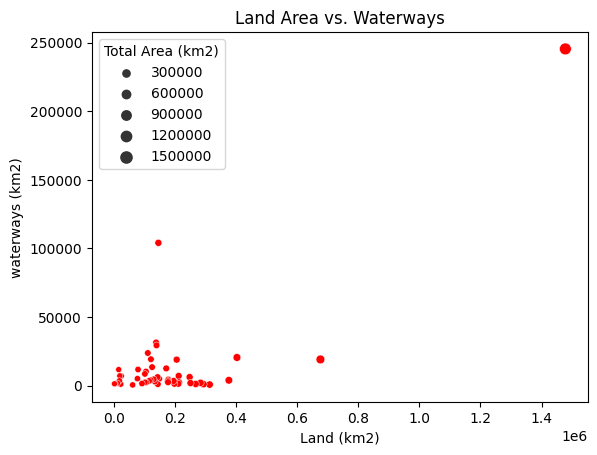

In [23]:
ax = sns.scatterplot(x='Land (km2)', y='waterways (km2)', color='red', size= 'Total Area (km2)', data=df)
ax.set_title('Land Area vs. Waterways')
plt.show

In [24]:
df.to_csv('US_states_land_area.csv', index=False)

# Citation
Wikipedia contributors. "List of U.S. states and territories by area." Wikipedia, The Free Encyclopedia. Wikipedia, The Free Encyclopedia, 31 Aug. 2023. Web. 19 Nov. 2023.